In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lgca import get_lgca
from itertools import product
import pickle as pkl
PATH = '.\\data\\gog\\nonlocaldensity_10reps\\'
parameters = np.load(PATH+'params.npz', allow_pickle=True)

constparams = parameters['constparams'].item()
r_ds = parameters['r_ds']
thetas = parameters['thetas']
reps = 10
# data = np.load(PATH+'n_pr.npy', allow_pickle=True)

In [3]:
kappas_r_t = [[[] for _ in range(len(thetas))] for _ in range(len(r_ds))]
resting_cells_r_t = np.zeros((len(r_ds), len(thetas), reps), dtype=int)
total_cells_r_t = np.zeros_like(resting_cells_r_t)
migrating_cells_r_t = np.zeros_like(resting_cells_r_t)
for index in product(np.arange(0, len(r_ds)), np.arange(0, len(thetas))):
    for i in range(reps):
        with open(PATH+'data{}.pkl'.format(index+(i, 0,)), 'rb') as f:
            d = pkl.load(f)
        kappas_r_t[index[0]][index[1]].append(list(d['kappa'][d['nodes_t'].sum()]))
        resting_cells_r_t[index[0], index[1], i] = len(d['nodes_t'][..., -1].sum())
        total_cells_r_t[index[0], index[1], i] = len(d['nodes_t'].sum())

migrating_cells_r_t = total_cells_r_t - resting_cells_r_t

In [4]:
resting_fraction_r_t = resting_cells_r_t / total_cells_r_t
migration_fraction_r_t = migrating_cells_r_t / total_cells_r_t

In [5]:
phenotype_entropy = - resting_fraction_r_t * np.log2(resting_fraction_r_t) - migration_fraction_r_t * np.log2(migration_fraction_r_t)
mean_phenotype_entropy = phenotype_entropy.mean(axis=-1)

In [6]:
dtheta = (thetas[1] - thetas[0]) / 2
dr_ds = (r_ds[1] - r_ds[0]) / 2
extent = [thetas[0]-dtheta, thetas[-1]+dtheta, r_ds[0]-dr_ds, r_ds[-1]+dr_ds]

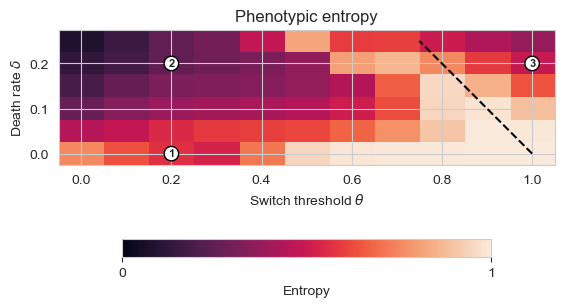

In [11]:
bbox_attr = dict(boxstyle='circle,pad=0.2', edgecolor='black', facecolor='white', linewidth=1)
plt.imshow(mean_phenotype_entropy, aspect='equal', vmin=0, vmax=1, extent=extent, origin='lower')
plt.colorbar(label=r'Entropy', pad=0.2, fraction=0.05, orientation='horizontal', ticks=[0, 1])
plt.xlabel(r'Switch threshold $\theta$')
plt.ylabel(r'Death rate $\delta$')
plt.text(0.2, 0., '1', fontsize=8, weight='bold',
        ha='center',
        va='center',
        bbox=bbox_attr
         )
plt.text(0.2, 0.2, '2', fontsize=8, weight='bold',
        ha='center',
        va='center',
        bbox=bbox_attr
         )
plt.text(1., 0.2, '3', fontsize=8, weight='bold', bbox=bbox_attr,
        ha='center',
        va='center',
         )
contour = plt.contour(thetas, r_ds, 1 - np.array(r_ds)[:, np.newaxis] - np.array(thetas)[np.newaxis, :], levels=[0], colors='k', linestyles='dashed', extent=extent, origin='lower')
plt.title('Phenotypic entropy')
plt.show()

In [7]:
def estimate_entropy(data):
    # Compute histogram of data using numpy's automatic bin selection
    hist, bin_edges = np.histogram(data, bins='auto', density=True)

    # Calculate bin widths
    bin_width = bin_edges[1] - bin_edges[0]
    print(hist.sum() * bin_width)

    # Create a masked array to handle zero probabilities
    probabilities = np.ma.masked_equal(hist, 0)

    # Compute the entropy
    entropy = -np.ma.sum(probabilities * np.ma.log2(probabilities) * bin_width)

    return entropy

In [8]:
genetic_entropy = [[[[estimate_entropy(kappas_r_t[i][j][k])] for k in range(reps)] for j in range(len(thetas))] for i in range(len(r_ds))]

0.9999999999999928
1.0000000000000033
1.000000000000004
1.000000000000004
1.0000000000000007
1.0000000000000038
1.0000000000000067
1.0000000000000002
0.9999999999999949
0.9999999999999978
1.000000000000003
0.9999999999999961
1.000000000000006
0.9999999999999949
0.9999999999999971
1.0000000000000022
0.9999999999999959
0.9999999999999937
1.0000000000000044
1.0000000000000013
1.0000000000000047
1.0000000000000013
0.999999999999998
1.0000000000000016
1.000000000000008
1.000000000000002
0.9999999999999962
0.9999999999999983
1.0000000000000004
1.000000000000002
0.999999999999997
1.0000000000000004
1.0000000000000073
0.9999999999999969
1.0000000000000027
0.9999999999999987
1.0000000000000018
1.0000000000000047
0.9999999999999937
1.0000000000000047
0.9999999999999958
1.0000000000000009
0.999999999999998
1.000000000000005
1.000000000000004
1.0000000000000033
0.9999999999999973
1.000000000000002
1.0000000000000009
0.9999999999999978
1.0000000000000042
1.000000000000005
0.9999999999999933
1.00000

(array([ 438., 1911., 4491., 6233., 7219., 7043., 6338., 6880., 4198.,
        1382.]),
 array([-19.56058128, -17.5021982 , -15.44381512, -13.38543204,
        -11.32704896,  -9.26866588,  -7.2102828 ,  -5.15189972,
         -3.09351664,  -1.03513356,   1.02324952]),
 <BarContainer object of 10 artists>)

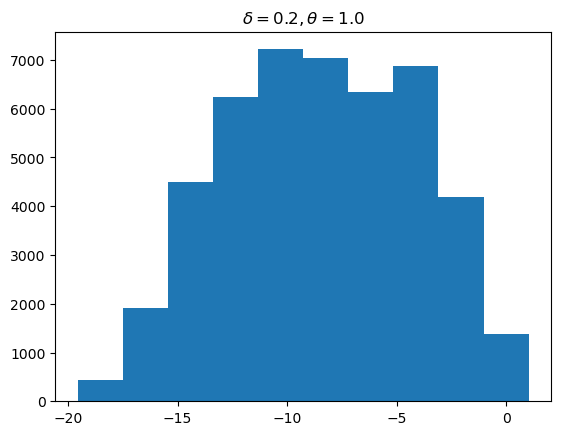

In [10]:
index = -2, -1, 0
plt.title(r'$\delta = {}, \theta = {}$'.format(r_ds[index[0]], thetas[index[1]]))
plt.hist(kappas_r_t[-2][-1][0])

In [9]:
genetic_entropy = np.array(genetic_entropy).mean(-1)
mean_genetic_entropy = genetic_entropy.mean(axis=-1)

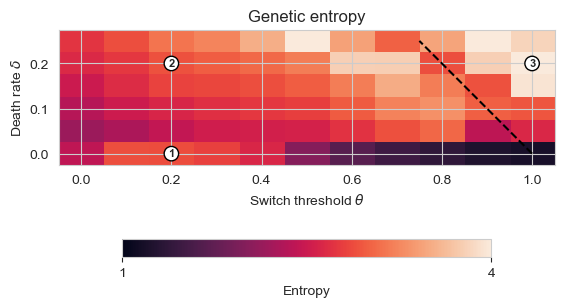

In [12]:
plt.imshow(mean_genetic_entropy, aspect='equal', extent=extent, origin='lower', vmin=1, vmax=4)
plt.colorbar(label=r'Entropy', pad=0.2, fraction=0.05, orientation='horizontal', ticks=[1, 4])
plt.xlabel(r'Switch threshold $\theta$')
plt.ylabel(r'Death rate $\delta$')
plt.text(0.2, 0., '1', fontsize=8, weight='bold',
        ha='center',
        va='center',
        bbox=bbox_attr
         )
plt.text(0.2, 0.2, '2', fontsize=8, weight='bold',
        ha='center',
        va='center',
        bbox=bbox_attr
         )
plt.text(1., 0.2, '3', fontsize=8, weight='bold', bbox=bbox_attr,
        ha='center',
        va='center',
         )
contour = plt.contour(thetas, r_ds, 1 - np.array(r_ds)[:, np.newaxis] - np.array(thetas)[np.newaxis, :], levels=[0], colors='k', linestyles='dashed', extent=extent, origin='lower')
plt.title('Genetic entropy')
plt.show()

In [ ]:
from scipy.stats import skew, kurtosis
from sklearn.mixture import GaussianMixture

In [14]:
# calculate bimodality coefficent
# calculate skewness
def bc(x):
    sk = skew(x)
    k = kurtosis(x, fisher=False)
    n = len(x)
    return (sk**2 + 1) / (k + 3 * ((n - 1)**2 / ((n - 2) * (n - 3))))

In [15]:
def aic_diff(x):
    f1 = GaussianMixture(n_components=1).fit(x[:, np.newaxis])
    f2 = GaussianMixture(n_components=2).fit(x[:, np.newaxis])
    aic1 = f1.aic(x[:, np.newaxis])
    aic2 = f2.aic(x[:, np.newaxis])
    return (aic1 - aic2) / max(aic1, aic2)

In [16]:
# kurt = np.array([[kurtosis(np.array(kappas_r_t[i][j]), fisher=False, bias=False) for j in range(len(thetas))] for i in range(len(r_ds))])

In [17]:
# bcs = np.array([[bc(np.array(kappas_r_t[i][j])) for j in range(len(thetas))] for i in range(len(r_ds))])

In [18]:
# aic = np.array([[aic_diff(np.array(kappas_r_t[i][j])) for j in range(len(thetas))] for i in range(len(r_ds))])

In [13]:
# med = np.array([[np.median(np.array(kappas_r_t[i][j])) for j in range(len(thetas))] for i in range(len(r_ds))])
kappas_r_t_temp = [[[] for j in range(len(thetas))] for i in range(len(r_ds))]
for i in range(len(r_ds)):
    for j in range(len(thetas)):
        for k in range(reps):
            kappas_r_t_temp[i][j].extend(kappas_r_t[i][j][k])
meankappa = np.array([[np.mean(np.array(kappas_r_t_temp[i][j])) for j in range(len(thetas))] for i in range(len(r_ds))])

In [ ]:
# skewness = np.array([[skew(np.array(kappas_r_t[i][j]), bias=False) for j in range(len(thetas))] for i in range(len(r_ds))])

In [ ]:
# plt.imshow(skewness, cmap='coolwarm', aspect='equal', vmax=2, vmin=-2)
# plt.colorbar()
# plt.show()

In [ ]:
# plt.imshow(pvals, cmap='gray', aspect='equal')
# plt.colorbar()

In [ ]:
# plt.imshow(bcs, cmap='gray', aspect='equal')
# plt.colorbar()

In [ ]:
# plt.imshow(aic, cmap='coolwarm', aspect='equal')
# plt.colorbar()

In [ ]:
# plt.imshow(aic> 0, cmap='gray', aspect='equal')
# plt.colorbar()

In [ ]:
from matplotlib.lines import Line2D
import os
style_path = os.path.abspath('./frontiers_style.mplstyle')
plt.style.use(style_path)

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

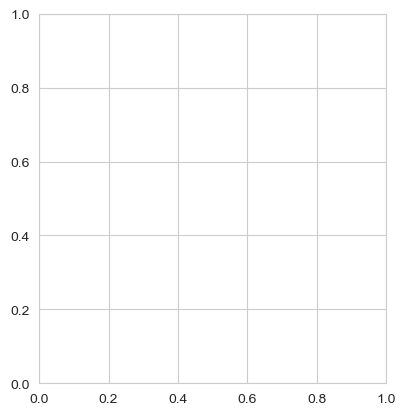

In [14]:
# Create a figure using the style
fig, ax = plt.subplots()
# Get the current figure size
fig_width, fig_height = fig.get_size_inches()

bbox_attr = dict(boxstyle='circle,pad=0.2', edgecolor='black', facecolor='white', linewidth=1)

# Set the new figure size by multiplying it by the scale factor
scale_factor = 0.7
fig.set_size_inches(fig_width * scale_factor, fig_height)
# plt.imshow(med, cmap='coolwarm', aspect='equal', extent=extent, vmin=-5, vmax=5, interpolation='none', origin='lower')
# place colorbar at bottom of image
plt.colorbar(label=r'Switch parameter ${\kappa}$', pad=0.2, fraction=0.05, orientation='horizontal')
plt.xlabel(r'Switch threshold $\theta$')
plt.ylabel(r'Death rate $\delta$')
plt.text(0.2, 0., '1', fontsize=8, weight='bold',
        ha='center',
        va='center',
        bbox=bbox_attr
         )
plt.text(0.2, 0.2, '2', fontsize=8, weight='bold',
        ha='center',
        va='center',
        bbox=bbox_attr
         )
plt.text(1., 0.2, '3', fontsize=8, weight='bold', bbox=bbox_attr,
        ha='center',
        va='center',
         )
contour = plt.contour(thetas, r_ds, 1 - np.array(r_ds)[:, np.newaxis] - np.array(thetas)[np.newaxis, :], levels=[0], colors='k', linestyles='dashed', extent=extent, origin='lower')
# custom_line = Line2D([0], [0], color='k', linestyle='dashed', label=r'$\rho_{\mathcal{N}}^{\max} - \theta = 0$')
custom_line = Line2D([0], [0], color='k', linestyle='dashed', label='Prediction')
plt.legend(handles=[custom_line], loc='lower right', bbox_to_anchor=(1, 1))
# plt.savefig('evolutionary_regimes.svg', bbox_inches='tight')
# plt.savefig('evolutionary_regimes.pdf', bbox_inches='tight')

NameError: name 'Line2D' is not defined

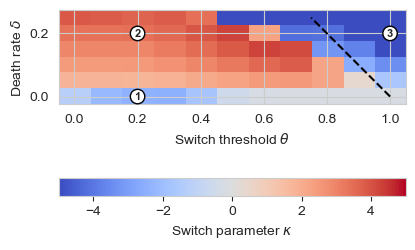

In [15]:
# Create a figure using the style
fig, ax = plt.subplots()
# Get the current figure size
fig_width, fig_height = fig.get_size_inches()

bbox_attr = dict(boxstyle='circle,pad=0.2', edgecolor='black', facecolor='white', linewidth=1)

# Set the new figure size by multiplying it by the scale factor
scale_factor = 0.7
fig.set_size_inches(fig_width * scale_factor, fig_height)
plt.imshow(meankappa, cmap='coolwarm', aspect='equal', extent=extent, vmin=-5, vmax=5, interpolation='none', origin='lower')
# place colorbar at bottom of image
plt.colorbar(label=r'Switch parameter ${\kappa}$', pad=0.2, fraction=0.05, orientation='horizontal')
plt.xlabel(r'Switch threshold $\theta$')
plt.ylabel(r'Death rate $\delta$')
plt.text(0.2, 0., '1', fontsize=8, weight='bold',
        ha='center',
        va='center',
        bbox=bbox_attr
         )
plt.text(0.2, 0.2, '2', fontsize=8, weight='bold',
        ha='center',
        va='center',
        bbox=bbox_attr
         )
plt.text(1., 0.2, '3', fontsize=8, weight='bold', bbox=bbox_attr,
        ha='center',
        va='center',
         )
contour = plt.contour(thetas, r_ds, 1 - np.array(r_ds)[:, np.newaxis] - np.array(thetas)[np.newaxis, :], levels=[0], colors='k', linestyles='dashed', extent=extent, origin='lower')
# custom_line = Line2D([0], [0], color='k', linestyle='dashed', label=r'$\rho_{\mathcal{N}}^{\max} - \theta = 0$')
custom_line = Line2D([0], [0], color='k', linestyle='dashed', label='Prediction')
plt.legend(handles=[custom_line], loc='lower right', bbox_to_anchor=(1, 1))
# plt.savefig('evolutionary_regimes.svg', bbox_inches='tight')
# plt.savefig('evolutionary_regimes.pdf', bbox_inches='tight')

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from lgca import get_lgca
from itertools import product
import pickle as pkl

PATH = '.\\data\\gog\\nonlocaldensity_10reps\\'
parameters = np.load(PATH + 'params.npz', allow_pickle=True)
PATH = '.\\data\\gog\\nonlocaldensity_recurrence\\'
constparams = parameters['constparams'].item()
r_ds = parameters['r_ds']
thetas = parameters['thetas']
reps = 10
dtheta = (thetas[1] - thetas[0]) / 2
dr_ds = (r_ds[1] - r_ds[0]) / 2
rec_time = np.zeros((len(r_ds), len(thetas), reps), dtype=int)
rec_time = np.ma.array(rec_time, mask=True)
for index in product(np.arange(0, len(r_ds)), np.arange(0, len(thetas))):
    for i in range(reps):
        with open(PATH + 'data{}.pkl'.format(index + (i, 0,)), 'rb') as f:
            d = pkl.load(f)
        rec_time[index + (i,)] = d['tmax']
        rec_time.mask[index + (i,)] = False if d['n_it'] > 0 else True

In [17]:
from goorgrow.fig2 import label_axes
from mpl_toolkits.axes_grid1 import make_axes_locatable


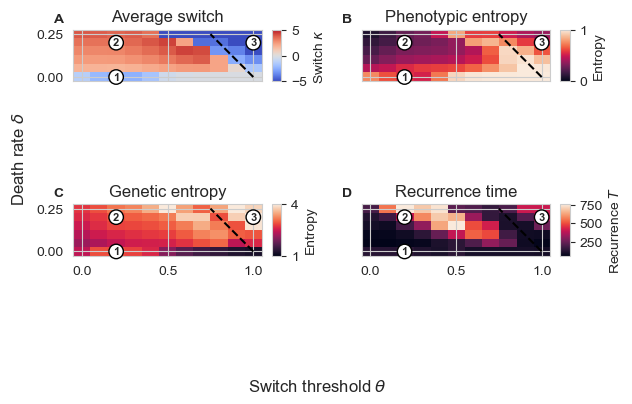

In [18]:
# create a figure with 4 subplots
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
# Get the current figure size
fig_width, fig_height = fig.get_size_inches()
# fig_height *= 1.5
fig.set_size_inches(fig_width, fig_height)

plt.sca(ax[0, 0])
# plt.xlabel(r'Switch threshold $\theta$')
# plt.ylabel(r'Death rate $\delta$')
plt.imshow(meankappa, cmap='coolwarm', aspect='equal', extent=extent, vmin=-5, vmax=5, interpolation='none', origin='lower')
# insert color bar to the right of image with the same height
divider = make_axes_locatable(ax[0,0])
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(label=r'Switch ${\kappa}$', pad=0.2, fraction=0.05, use_gridspec=True, cax=cax)
# plt.colorbar(label=r'Switch parameter ${\kappa}$', pad=0.2, fraction=0.05, orientation='vertical')
# plt.xlabel(r'Switch threshold $\theta$')
# plt.ylabel(r'Death rate $\delta$')
plt.sca(ax[0, 0])

plt.text(0.2, 0., '1', fontsize=8, weight='bold',
        ha='center',
        va='center',
        bbox=bbox_attr
         )
plt.text(0.2, 0.2, '2', fontsize=8, weight='bold',
        ha='center',
        va='center',
        bbox=bbox_attr
         )
plt.text(1., 0.2, '3', fontsize=8, weight='bold', bbox=bbox_attr,
        ha='center',
        va='center',
         )
contour = plt.contour(thetas, r_ds, 1 - np.array(r_ds)[:, np.newaxis] - np.array(thetas)[np.newaxis, :], levels=[0], colors='k', linestyles='dashed', extent=extent, origin='lower')
# custom_line = Line2D([0], [0], color='k', linestyle='dashed', label=r'$\rho_{\mathcal{N}}^{\max} - \theta = 0$')
# custom_line = Line2D([0], [0], color='k', linestyle='dashed', label='Prediction')
# plt.legend(handles=[custom_line], loc='lower right', bbox_to_anchor=(1, 1))
plt.title('Average switch')

plt.sca(ax[0, 1])
plt.imshow(mean_phenotype_entropy, aspect='equal', vmin=0, vmax=1, extent=extent, origin='lower')
divider = make_axes_locatable(ax[0,1])
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(label=r'Entropy', pad=0.2, fraction=0.05, orientation='vertical', ticks=[0, 1], cax=cax, use_gridspec=True)
plt.sca(ax[0, 1])
plt.text(0.2, 0., '1', fontsize=8, weight='bold',
        ha='center',
        va='center',
        bbox=bbox_attr
         )
plt.text(0.2, 0.2, '2', fontsize=8, weight='bold',
        ha='center',
        va='center',
        bbox=bbox_attr
         )
plt.text(1., 0.2, '3', fontsize=8, weight='bold', bbox=bbox_attr,
        ha='center',
        va='center',
         )
contour = plt.contour(thetas, r_ds, 1 - np.array(r_ds)[:, np.newaxis] - np.array(thetas)[np.newaxis, :], levels=[0], colors='k', linestyles='dashed', extent=extent, origin='lower')
plt.title('Phenotypic entropy')

plt.sca(ax[1, 0])
plt.imshow(mean_genetic_entropy, aspect='equal', extent=extent, origin='lower', vmin=1, vmax=4)
divider = make_axes_locatable(ax[1, 0])
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(label=r'Entropy', pad=0.2, fraction=0.05, ticks=[1, 4], cax=cax, use_gridspec=True)
plt.sca(ax[1, 0])
plt.text(0.2, 0., '1', fontsize=8, weight='bold',
        ha='center',
        va='center',
        bbox=bbox_attr
         )
plt.text(0.2, 0.2, '2', fontsize=8, weight='bold',
        ha='center',
        va='center',
        bbox=bbox_attr
         )
plt.text(1., 0.2, '3', fontsize=8, weight='bold', bbox=bbox_attr,
        ha='center',
        va='center',
         )
contour = plt.contour(thetas, r_ds, 1 - np.array(r_ds)[:, np.newaxis] - np.array(thetas)[np.newaxis, :], levels=[0], colors='k', linestyles='dashed', extent=extent, origin='lower')
plt.title('Genetic entropy')
# plt.ylabel(r'Death rate $\delta$')

plt.sca(ax[-1, -1])
plt.imshow(rec_time.mean(-1), aspect='equal', extent=extent, origin='lower', )
plt.text(0.2, 0., '1', fontsize=8, weight='bold',
        ha='center',
        va='center',
        bbox=bbox_attr
         )
plt.text(0.2, 0.2, '2', fontsize=8, weight='bold',
        ha='center',
        va='center',
        bbox=bbox_attr
         )
plt.text(1., 0.2, '3', fontsize=8, weight='bold', bbox=bbox_attr,
        ha='center',
        va='center',
         )
divider = make_axes_locatable(ax[1,1])
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(label=r'Recurrence $T$', pad=0.2, fraction=0.05, orientation='vertical', use_gridspec=True, cax=cax)
plt.sca(ax[-1, -1])
contour = plt.contour(thetas, r_ds, 1 - np.array(r_ds)[:, np.newaxis] - np.array(thetas)[np.newaxis, :], levels=[0], colors='k', linestyles='dashed', extent=extent, origin='lower')
plt.ylim(-dr_ds, r_ds[-1]+dr_ds)
plt.title('Recurrence time')
plt.xticks([0, 0.5, 1])
fig.supxlabel(r'Switch threshold $\theta$')
fig.supylabel(r'Death rate $\delta$')
label_axes(fig, labels=['A', 'B', 'C', 'D', '', '', '', ''])
fig.tight_layout()
# plt.savefig('evolutionary_regimes.pdf', bbox_inches='tight')
# plt.savefig('evolutionary_regimes.svg', bbox_inches='tight')

In [19]:
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [20]:
kappas_r_t_df = np.zeros((len(r_ds), len(thetas), reps))
for i in range(len(r_ds)):
    for j in range(len(thetas)):
        for k in range(reps):
            kappas_r_t_df[i, j, k] = np.mean(kappas_r_t[i][j][k])

In [ ]:
# kappas_r_t, genetic_entropy, phenotype_entropy, rec_time, r_ds, thetas

In [23]:
x, y, z = kappas_r_t_df.shape

In [24]:
combinations = x * y
total_repetitions = combinations * z

In [25]:
expanded_r_ds = np.repeat(r_ds, y).repeat(z)
expanded_thetas = np.tile(thetas, x).repeat(z)


In [26]:
params_df = pd.DataFrame({
    'r_d': expanded_r_ds,
    'theta': expanded_thetas,
    'repetition': np.tile(np.arange(z), combinations)
}, index=np.arange(total_repetitions))

In [28]:
kappas_flat = kappas_r_t_df.flatten()
genetic_entropy_flat = genetic_entropy.flatten()
phenotype_entropy_flat = phenotype_entropy.flatten()
rectime_flat = rec_time.flatten()

kappas_df = pd.DataFrame({'kappa': kappas_flat}, index=np.arange(total_repetitions))
genetic_entropy_df = pd.DataFrame({'genetic_entropy': genetic_entropy_flat}, index=np.arange(total_repetitions))
phenotype_entropy_df = pd.DataFrame({'phenotype_entropy': phenotype_entropy_flat}, index=np.arange(total_repetitions))
rectime_df = pd.DataFrame({'rectime': rectime_flat}, index=np.arange(total_repetitions))

In [29]:
df = pd.concat([params_df, kappas_df, genetic_entropy_df, phenotype_entropy_df, rectime_df], axis=1)

In [30]:
df.head()

,r_d,theta,repetition,kappa,genetic_entropy,phenotype_entropy,rectime
0,0.0,0.0,0,-1.635913,2.687159,0.694025,129.0
1,0.0,0.0,1,-0.865879,2.060866,0.807282,154.0
2,0.0,0.0,2,-1.545359,2.737255,0.758394,140.0
3,0.0,0.0,3,-1.495602,2.615735,0.744453,165.0
4,0.0,0.0,4,-1.837688,2.675741,0.650427,122.0


In [31]:
# df.to_csv('treatment.csv', index=False)  # save df to csv